In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
def process_line(line):
    if line[:3] == "no-":
        parts = line.split("_")
        parts = map(lambda p: p.split("-"), parts)
        parts = [(k, v if k == 'q' else int(float(v))) for k,v in parts]
        return { k:v for k,v in parts}
    return None

def load_trace(fn):
    with open(fn, 'r') as f:
        results = filter(None, map(process_line, f.readlines()))
        return pd.DataFrame(results)
    
def combine_traces(*fns):
    fnit = iter(fns)
    dfs = []
    for fn in fnit:
        df = load_trace(fn)
        df["nosds"] = next(fnit)
        dfs.append(df)
    return pd.concat(dfs)

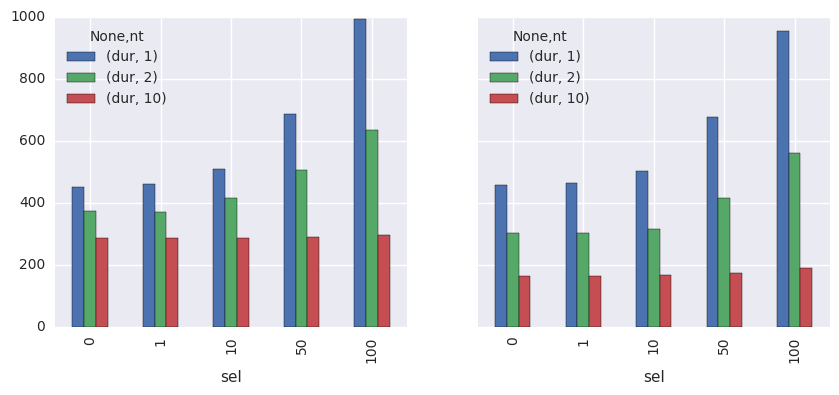

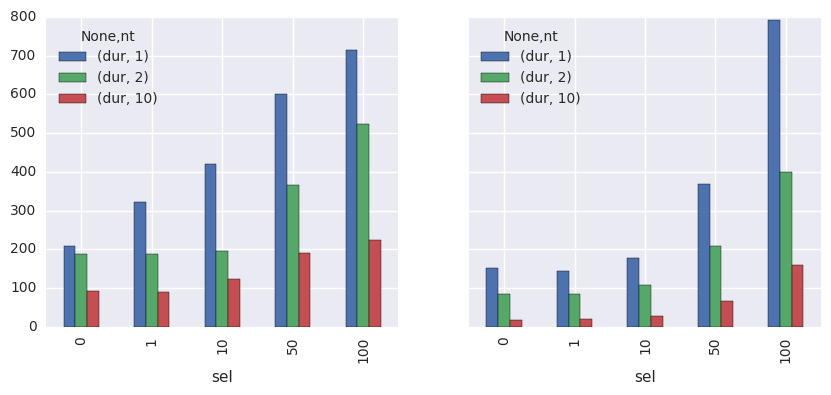

In [3]:
df = combine_traces("1osd_128pg/run.log", 1, "2osd_25pg/run.log", 2)
del df['no']
del df['q']
del df['ep']
del df['run'] # use coldcache

def doplot(df, coldcache):
    cc = df[df.coldcache == coldcache]
    del cc['coldcache']
    cc = cc.groupby(['nosds', 'nt', 'sel']).mean().unstack([0, 1])
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))
    cc.xs(1, level='nosds', axis=1).plot.bar(ax=ax[0])
    cc.xs(2, level='nosds', axis=1).plot.bar(ax=ax[1])
    
doplot(df, 1)
doplot(df, 0)

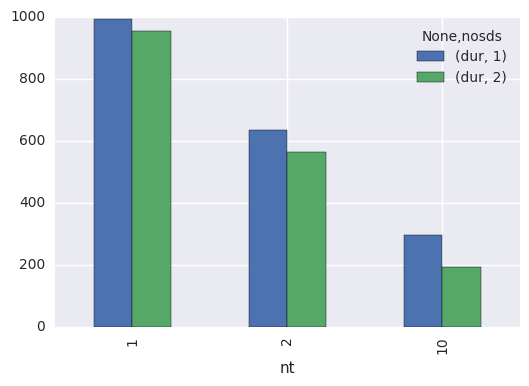

In [4]:
cc = df[(df.coldcache == 1)]
cc = cc[(cc.sel == 100)]
del cc['coldcache']
del cc['sel']
cc.groupby(['nt', 'nosds']).mean().unstack(-1).plot.bar()

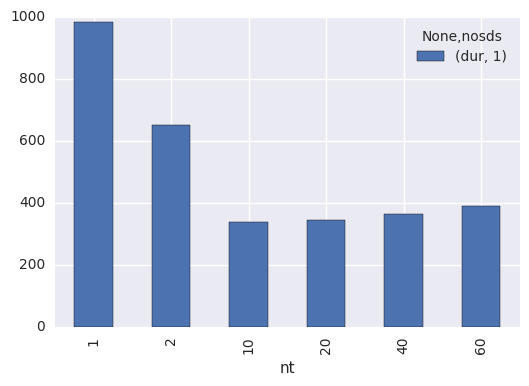

In [5]:
df2 = combine_traces("1osd_128pg_thread_spread_v2/run.log", 1)
del df2['no']
del df2['q']
del df2['ep']
del df2['run'] # use coldcache
cc = df2[(df2.coldcache == 1)]
cc = cc[(cc.sel == 100)]
del cc['coldcache']
del cc['sel']
cc.groupby(['nt', 'nosds']).mean().unstack(-1).plot.bar()